# Бета распределение

График бета распределения зависит от того, какие параметры (альфа и бета) мы выбирем. В своем примере я беру альфу и бету (a,b) равными 0.5. Ниже вы можете увидеть само бета распределение и его плотность. 

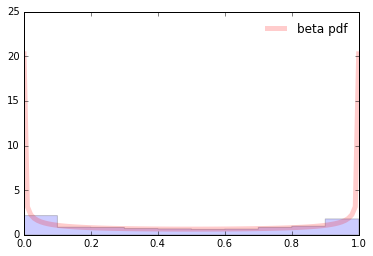

In [40]:
from scipy.stats import beta
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, ax = plt.subplots(1, 1)

a, b = 0.5, 0.5
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.2, label='beta pdf')
r = beta.rvs(a, b, size=1000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

Математическое ожидание Бета распределения высчитывается по формуле: $$ \frac{\alpha}{\alpha+\beta} $$ А дисперсия по этой: $$ \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)} $$

In [41]:
mt = float(a)/(a+b)
dis = a*b/(((a+b)**2.)*(a+b+1))

В примере я беру выборки объема N = 2, 5, 7, 10, 20, 30, 40, 50, 100 и 500. Математическое ожидание и среднее отклонение для нормального распределения берем из нашего начального бета распределения.

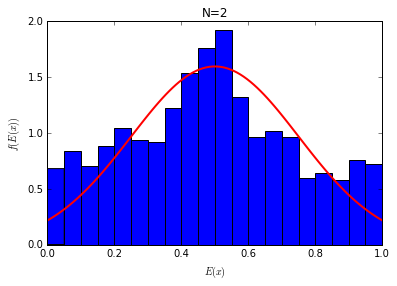

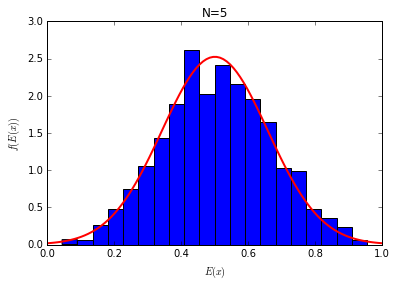

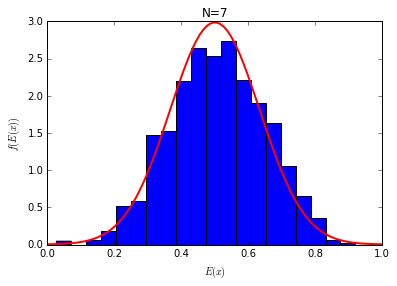

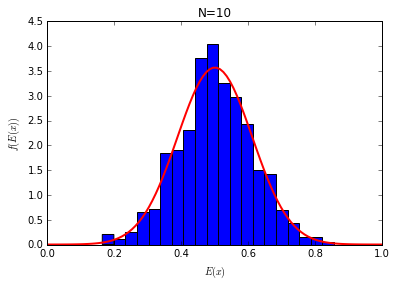

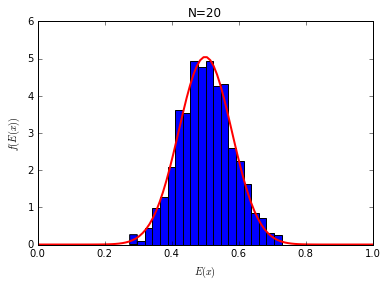

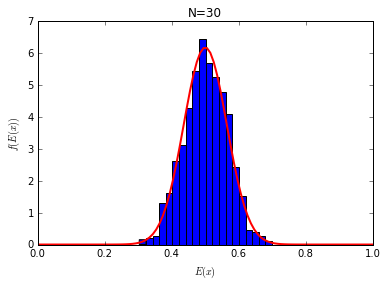

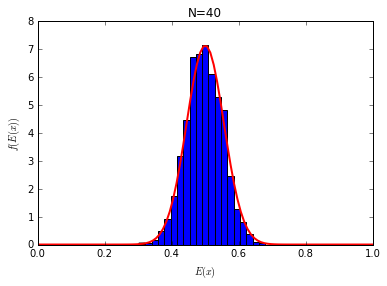

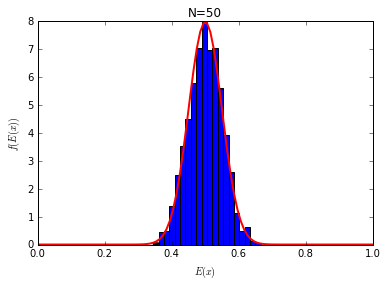

In [45]:
from scipy.stats import norm, beta
for N in [2, 5, 7, 10, 20, 30, 40, 50]:
    data = beta.rvs(a,b, size=(1000,N))
    mean_of_data = np.mean(data,1) 
    plt.figure()
    plt.hist(mean_of_data,bins=20,normed=True)
    x = np.linspace(0,1,100)
    norm_rv = sts.norm(mt, (dis/N)**0.5)
    y = norm_rv.pdf(x)
    plt.plot(x,y,'r', lw=2)
    plt.ylabel('$f(E(x))$')
    plt.xlabel('$E(x)$')
    plt.title('N='+str(N))

Отдельно для N = 100,500,1000 (c масштабированием)

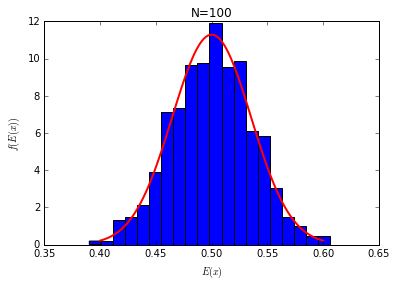

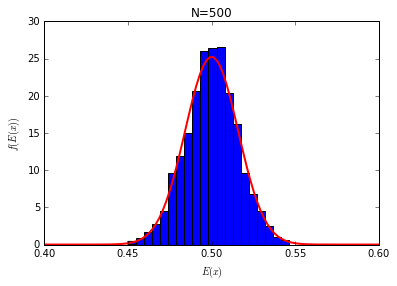

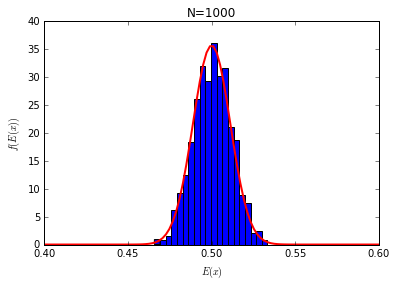

In [46]:
for N in [100,500,1000]:
    data = beta.rvs(a,b, size=(1000,N))
    mean_of_data = np.mean(data,1) 
    plt.figure()
    plt.hist(mean_of_data,bins=20,normed=True)
    x = np.linspace(0.4,0.6,100)
    norm_rv = sts.norm(mt,(dis/N)**0.5)
    y = norm_rv.pdf(x)
    plt.plot(x,y,'r', lw=2)
    plt.ylabel('$f(E(x))$')
    plt.xlabel('$E(x)$')
    plt.title('N='+str(N))

## Вывод:

Можно сказать, что выполнение ЦПТ начинается с выборок объема 20-30, но если увеличивать объем, то наши гистограммы всё лучше аппроксимируются плотностью нормального распределения.